In [14]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

from libs.MarkovModel import compute_context_aware_transition_matrix
from libs.MarkovModel import encode_float_filename
from libs.MarkovModel import AggregateMarkov

In [15]:
parentFolder = "../part01_traffic_prediction/Results/TrafficPredictor/evaluate/ratio_0_5/CA"

def GetTrafficData(direction, lenWindow, mode, dbParams):
    dbpString = encode_float_filename(dbParams)
    with open(f"{parentFolder}/{direction}_{lenWindow}_{mode}_{dbpString}.txt_train.pkl", "rb") as file:
        resultsTrain = pickle.load(file)
    N_data_for_modeling = -1
    trafficTargetDistribution = resultsTrain['classDistribu_predicted'][0:N_data_for_modeling]
    trafficSource = resultsTrain['trafficSource_actual'][0:N_data_for_modeling]
    trafficTarget_actual = resultsTrain['trafficTarget_actual'][0:N_data_for_modeling]
    trafficTarget_predicted = resultsTrain['trafficTarget_predicted'][0:N_data_for_modeling]
    return trafficSource, trafficTargetDistribution, trafficTarget_actual, trafficTarget_predicted


In [16]:
lenWindow = 10
direction = "forward"
mode = "fixed"
dbParams = 0.01
numAggregatedTraffic = 4

dbpString = encode_float_filename(dbParams)
trafficSource, trafficTargetDistribution, trafficTarget_actual, trafficTarget_predicted = GetTrafficData(direction, lenWindow, mode, dbParams)
aggregateMarkov = AggregateMarkov()
aggregateMarkov.registerTrafficData(trafficSource, trafficTargetDistribution, trafficTarget_actual, trafficTarget_predicted, lenWindow)
aggregateMarkov.updateAggregateModel(numAggregatedTraffic)
# Save the aggregated Markov model
output_dir = f"Results/MarkovModel/{direction}/{mode}_{dbpString}/{lenWindow}"
os.makedirs(output_dir, exist_ok=True)
aggregateMarkov.saveResult(f"{output_dir}/{lenWindow}_to_{numAggregatedTraffic}.pkl")


(11, 11)
[[9.36585366e-01 5.69105691e-02 6.50406504e-03 0.00000000e+00]
 [7.92534722e-01 1.90972222e-01 1.56250000e-02 8.68055556e-04]
 [5.00000000e-01 3.63372093e-01 1.33720930e-01 2.90697674e-03]
 [1.63301141e-01 3.23968393e-01 4.53906936e-01 5.88235294e-02]
 [4.43458980e-02 2.09534368e-01 6.00886918e-01 1.45232816e-01]
 [3.86100386e-02 1.31274131e-01 5.83011583e-01 2.47104247e-01]
 [6.17283951e-02 9.87654321e-02 5.30864198e-01 3.08641975e-01]
 [0.00000000e+00 1.81818182e-01 6.36363636e-01 1.81818182e-01]
 [0.00000000e+00 0.00000000e+00 6.66666667e-01 3.33333333e-01]
 [0.00000000e+00 0.00000000e+00 6.66666667e-01 3.33333333e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


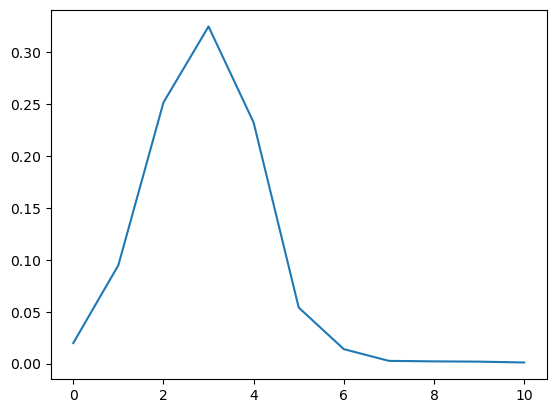

In [17]:
#aggregateMarkov.updateAggregateModel(10)
print(aggregateMarkov.trafficTrans.shape)
plt.plot(aggregateMarkov.trafficTrans[10,:])

print(aggregateMarkov.P_vEst_given_v)
print(np.sum(aggregateMarkov.P_vEst_given_v, axis=1))